In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Breast Cancer Dataset

In [ ]:
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2)
dataset_size = len(train_X)
train_X.shape, test_X.shape

((455, 30), (114, 30))

## Parameter Initialization

In [ ]:
itr = 20
learning_rate = 0.01

log_odds = np.zeros([itr+1, dataset_size])
prob = np.zeros([itr+1, dataset_size])
residuals = np.zeros([itr+1, dataset_size])
loss = [0]* (itr+1)
score = np.zeros([itr+1])
trees = []
gamma_value = np.zeros([itr+1, 100]) # set to max number of leaves
gamma = np.zeros([itr+1, dataset_size])

## Prediction at itr 0



In [ ]:
yes = np.sum(train_y)
no = len(train_y)-yes

log_odd_0 = np.log(yes/no)
prob_0 = np.exp(log_odd_0)/(1+np.exp(log_odd_0))
loss_0 = -(train_y*np.log(prob_0) + (1-train_y)*np.log(1-prob_0))
print("Log of odds at itr 0 ", log_odd_0)
print("Predicted probability at itr 0", prob_0)
print("Loss at itr 0", loss_0.sum())

# Set value
log_odds[0] = [log_odd_0] * dataset_size
prob[0] = [prob_0] * dataset_size
residuals[0] = train_y - prob[0]
loss[0] = loss_0.sum()
score[0] = np.sum((prob[0] >= 0.5)*1.0 == train_y)/dataset_size

Log of odds at itr 0  0.554438899755889
Predicted probability at itr 0 0.6351648351648351
Loss at itr 0 298.5480398910033


In [ ]:
for i in range(itr):
  dt = DecisionTreeRegressor(max_depth=2)
  dt = dt.fit(train_X, residuals[i])
  tree = dt.tree_
  trees.append(tree)
  leaf_indeces = dt.apply(train_X)
  unique_leaves=np.unique(leaf_indeces)
  n_leaf=len(unique_leaves)
  
  for ileaf in range(n_leaf):
    leaf_index = unique_leaves[ileaf]
    n_leaf = len(leaf_indeces[leaf_indeces==leaf_index])
    previous_probability = prob[i][leaf_indeces==leaf_index]
    denominator = np.sum(previous_probability * (1-previous_probability))
    igamma = (tree.value[ileaf+1][0][0] * n_leaf) / denominator
    gamma_value[i][ileaf] = igamma

  gamma[i] = [gamma_value[i][np.where(unique_leaves==index)] for index in leaf_indeces]

  log_odds[i+1] = log_odds[i] + learning_rate * gamma[i]
  prob[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_odds[i+1]])
  score[i+1]=np.sum((prob[i+1]>0.5)*1.0==train_y) / dataset_size
  residuals[i+1] = train_y - prob[i+1]
  loss[i+1]=np.sum(-train_y * log_odds[i+1] + np.log(1+np.exp(log_odds[i+1])))

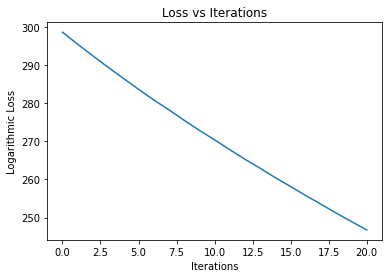

In [ ]:
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Logarithmic Loss")
plt.title("Loss vs Iterations")
plt.show()

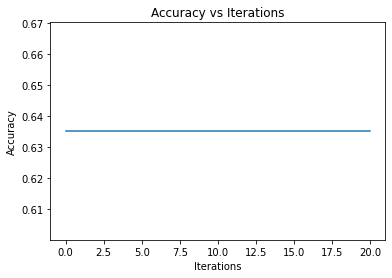

In [ ]:
plt.plot(score)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations")
plt.show()

In [ ]:
def prediction(trees, gamma_value, test_X, learning_rate, test_gamma):
  for i in range(len(trees)):
    dt = trees[i]
    leaf_indeces = dt.apply(test_X)
    unique_leaves=np.unique(leaf_indeces)
    n_leaf=len(unique_leaves)
    test_gamma[i] = [gamma_value[i][np.where(unique_leaves==index)] for index in leaf_indeces]
  y_gamma = np.zeros((len(test_X)))
  for i in range(len(test_gamma)):
    y_gamma = y_gamma + (0.1)*test_gamma[i]
  return (y_gamma >= 0.5)*1.0

In [ ]:
test_gamma = np.zeros([itr+1, len(test_X)])
test_predictions = prediction(trees, gamma_value, test_X.astype(np.float32), learning_rate, test_gamma) 

In [ ]:
print("test score", np.sum((test_predictions == test_y)/len(test_y)))

test score 0.9298245614035088


In [ ]:
score[-1]

0.6351648351648351

In [ ]:
depth = [1,2,3,4,5]
train_accuracy = []
test_accuracy = []
dataset_size = len(train_X)
for j in range(len(depth)):
  curr_depth = depth[j]
  itr = 40
  learning_rate = 0.001

  log_odds = np.zeros([itr+1, dataset_size])
  prob = np.zeros([itr+1, dataset_size])
  residuals = np.zeros([itr+1, dataset_size])
  loss = [0]* (itr+1)
  score = np.zeros([itr+1])
  trees = []
  gamma_value = np.zeros([itr+1, 100]) # set to max number of leaves
  gamma = np.zeros([itr+1, dataset_size])

  yes = np.sum(train_y)
  no = len(train_y)-yes

  log_odd_0 = np.log(yes/no)
  prob_0 = np.exp(log_odd_0)/(1+np.exp(log_odd_0))
  loss_0 = -(train_y*np.log(prob_0) + (1-train_y)*np.log(1-prob_0))
  print("Log of odds at itr 0 ", log_odd_0)
  print("Predicted probability at itr 0", prob_0)
  print("Loss at itr 0", loss_0.sum())

  # Set value
  log_odds[0] = [log_odd_0] * dataset_size
  prob[0] = [prob_0] * dataset_size
  residuals[0] = train_y - prob[0]
  loss[0] = loss_0.sum()
  score[0] = np.sum((prob[0] >= 0.5)*1.0 == train_y)/dataset_size

  for i in range(itr):
    dt = DecisionTreeRegressor(max_depth=curr_depth)
    dt = dt.fit(train_X, residuals[i])
    tree = dt.tree_
    trees.append(tree)
    leaf_indeces = dt.apply(train_X)
    unique_leaves=np.unique(leaf_indeces)
    n_leaf=len(unique_leaves)
    
    for ileaf in range(n_leaf):
      leaf_index = unique_leaves[ileaf]
      n_leaf = len(leaf_indeces[leaf_indeces==leaf_index])
      previous_probability = prob[i][leaf_indeces==leaf_index]
      denominator = np.sum(previous_probability * (1-previous_probability))
      igamma = (tree.value[ileaf+1][0][0] * n_leaf) / denominator
      gamma_value[i][ileaf] = igamma

    gamma[i] = [gamma_value[i][np.where(unique_leaves==index)] for index in leaf_indeces]

    log_odds[i+1] = log_odds[i] + learning_rate * gamma[i]
    prob[i+1] = np.array([np.exp(odds)/(np.exp(odds)+1) for odds in log_odds[i+1]])
    score[i+1]=np.sum((prob[i+1]>=0.5)*1.0==train_y) / dataset_size
    residuals[i+1] = train_y - prob[i+1]
    loss[i+1]=np.sum(-train_y * log_odds[i+1] + np.log(1+np.exp(log_odds[i+1])))
  
  def prediction(trees, gamma_value, test_X, learning_rate, test_gamma):
    for i in range(len(trees)):
      dt = trees[i]
      leaf_indeces = dt.apply(test_X)
      unique_leaves=np.unique(leaf_indeces)
      n_leaf=len(unique_leaves)
      test_gamma[i] = [gamma_value[i][np.where(unique_leaves==index)] for index in leaf_indeces]
    y_gamma = np.zeros((len(test_X)))
    for i in range(len(test_gamma)):
      y_gamma = y_gamma + (0.1)*test_gamma[i]
    return (y_gamma >= 0.5)*1.0
  
  test_gamma = np.zeros([itr+1, len(test_X)])
  test_predictions = prediction(trees, gamma_value, test_X.astype(np.float32), learning_rate, test_gamma) 

  test_accuracy.append(np.sum((test_predictions == test_y)/len(test_y)))
  train_accuracy.append(score[-1])


Log of odds at itr 0  0.554438899755889
Predicted probability at itr 0 0.6351648351648351
Loss at itr 0 298.5480398910033
Log of odds at itr 0  0.554438899755889
Predicted probability at itr 0 0.6351648351648351
Loss at itr 0 298.5480398910033
Log of odds at itr 0  0.554438899755889
Predicted probability at itr 0 0.6351648351648351
Loss at itr 0 298.5480398910033
Log of odds at itr 0  0.554438899755889
Predicted probability at itr 0 0.6351648351648351
Loss at itr 0 298.5480398910033
Log of odds at itr 0  0.554438899755889
Predicted probability at itr 0 0.6351648351648351
Loss at itr 0 298.5480398910033


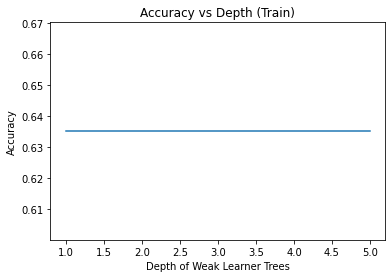

In [ ]:
plt.plot(depth, train_accuracy)
plt.xlabel("Depth of Weak Learner Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depth (Train)")
plt.show()

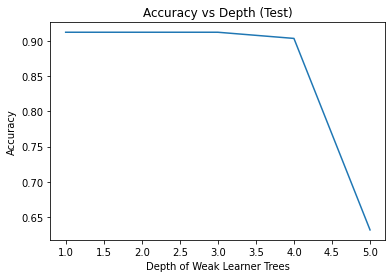

In [ ]:
plt.plot(depth, test_accuracy)
plt.xlabel("Depth of Weak Learner Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Depth (Test)")
plt.show()